<a href="https://colab.research.google.com/github/cgyireh1/Water-Quality-Model-PL_Group7/blob/main/Water_Quality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Quality Dataset used to train this model.
This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv

# Loading  data and prepare it for training

**All necessary  imports**

In [88]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import StandardScaler
path = "/content/water_potability.csv"

df = pd.read_csv(path)

print(df.shape)
print(df.head())

(3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  



# Data clean up

In [89]:
# Handling missing data

df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

# Print the cleaned dataframe shape and a few rows to check
print(df.shape)
print(df.head())

(3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Class Balance Check

In [90]:
print(df[df['Potability'] == 0].shape)
print(df[df['Potability'] == 1].shape)

(1998, 10)
(1278, 10)


In [91]:
columns_to_scale = df.columns.drop('Potability')
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df_scaled.head())


             ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -6.043133e-16  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       -1.180651         1.306149  -1.286298           0  
1        0.270597        -0.638480   0.684218           0  
2        0.781117         0.001509  -1.167365           0  
3        1.255134         2.152874   0.848412           0  
4       -0.824357        -2.181599   0.138786           0  


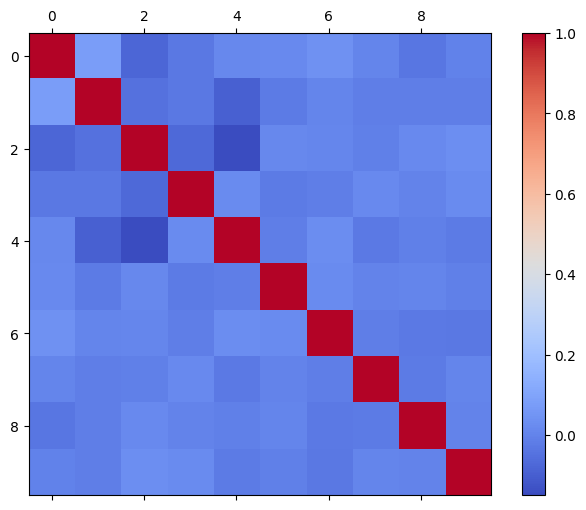

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.matshow(df.corr(), fignum=False, cmap='coolwarm')
plt.colorbar()
plt.show()


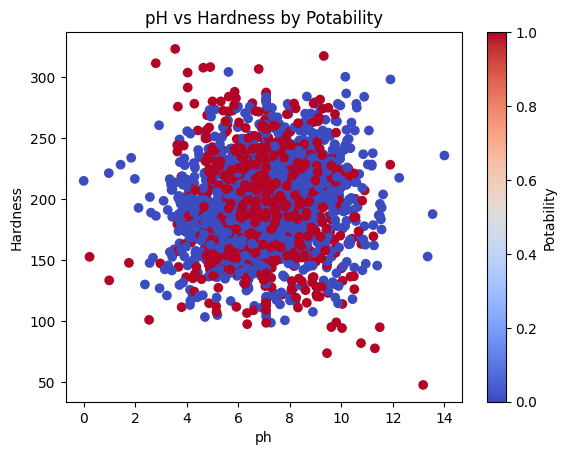

In [93]:
plt.scatter(df['ph'], df['Hardness'], c=df['Potability'], cmap='coolwarm')
plt.xlabel('ph')
plt.ylabel('Hardness')
plt.colorbar(label='Potability')
plt.title('pH vs Hardness by Potability')
plt.show()

**Data Splitting:**

In [94]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df_scaled[columns_to_scale]
y = df['Potability']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2620, 9)
X_test shape: (656, 9)
y_train shape: (2620,)
y_test shape: (656,)


## Defining The Model

In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6368 - loss: 6.1537 
Test Loss: 5.570104598999023
Test Accuracy: 0.6402438879013062


## Using L1 Regularization to regularize the model

In [97]:
# Model with L1 Regularization

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam

model_l1 = Sequential()
model_l1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)))
model_l1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model_l1.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model_l1.add(Dense(8, activation='relu', kernel_regularizer=l1(0.01)))
model_l1.add(Dense(1, activation='sigmoid'))

model_l1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_l1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


history = model_l1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32, callbacks=[early_stopping, reduce_lr], verbose=0)

loss_l1, accuracy_l1 = model_l1.evaluate(X_test, y_test)
print("Test Loss:", loss_l1)
print("Test Accuracy:", accuracy_l1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.6559 
Test Loss: 0.6610702872276306
Test Accuracy: 0.6280487775802612


# Train the Model with Dropout

In [99]:
# Model with Dropout

model_dropout = Sequential()
model_dropout.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(16, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(8, activation='relu'))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)                    │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0, callbacks=[es])

loss_dropout, accuracy_dropout = model_dropout.evaluate(X_test, y_test)
print("Test Loss:", loss_dropout)
print("Test Accuracy:", accuracy_dropout)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.5879 
Test Loss: 0.594987154006958
Test Accuracy: 0.6783536672592163


# Let's compile the mode with RMSprop optmiser

In [101]:
# Model with RMSprop optimizer
model_rmsprop = Sequential()
model_rmsprop.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_rmsprop.add(Dense(32, activation='relu'))
model_rmsprop.add(Dense(16, activation='relu'))
model_rmsprop.add(Dense(8, activation='relu'))
model_rmsprop.add(Dense(1, activation='sigmoid'))

model_rmsprop.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model_rmsprop.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_rmsprop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0, callbacks=[es])

loss_rmsprop, accuracy_rmsprop = model_rmsprop.evaluate(X_test, y_test)
print("Test Loss:", loss_rmsprop)
print("Test Accuracy:", accuracy_rmsprop)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.5898 
Test Loss: 0.596949577331543
Test Accuracy: 0.6951219439506531


# Regularize the model with L1 and optmize it with RMSprop

In [103]:
# Model with L1 Regularization with RMSProp

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam

model_l1_rmsprop = Sequential()
model_l1_rmsprop.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)))
model_l1_rmsprop.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model_l1_rmsprop.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model_l1_rmsprop.add(Dense(8, activation='relu', kernel_regularizer=l1(0.01)))
model_l1_rmsprop.add(Dense(1, activation='sigmoid'))

model_l1_rmsprop.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)                    │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

model_l1_rmsprop.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_l1_rmsprop.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0, callbacks=[es])

loss_l1_rmsprop, accuracy_l1_rmsprop = model_l1_rmsprop.evaluate(X_test, y_test)
print("Test Loss:", loss_l1_rmsprop)
print("Test Accuracy:", accuracy_l1_rmsprop)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.6719 
Test Loss: 0.6771661043167114
Test Accuracy: 0.6280487775802612


# Use L2 Regularization to improve the model

In [105]:

l2_reg = 0.01

# Model with L2 regularization and Dropout
model_l2_dropout = Sequential()
model_l2_dropout.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_reg)))
model_l2_dropout.add(Dropout(0.3))
model_l2_dropout.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)))
model_l2_dropout.add(Dropout(0.3))
model_l2_dropout.add(Dense(16, activation='relu', kernel_regularizer=l2(l2_reg)))
model_l2_dropout.add(Dropout(0.3))
model_l2_dropout.add(Dense(8, activation='relu', kernel_regularizer=l2(l2_reg)))
model_l2_dropout.add(Dense(1, activation='sigmoid'))

# Model summary
model_l2_dropout.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)                    │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:

# Compile the model with L2 regularization
model_l2_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with EarlyStopping
history = model_l2_dropout.fit(X_train, y_train, validation_data=(X_test, y_test),
                               epochs=1000, verbose=0, callbacks=[es])

# Evaluate the model
loss_l2, accuracy_l2 = model_l2_dropout.evaluate(X_test, y_test)

# Print test loss and accuracy
print("Test Loss:", loss_l2)
print("Test Accuracy:", accuracy_l2)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6400 - loss: 0.6558 
Test Loss: 0.6609976887702942
Test Accuracy: 0.6280487775802612


# Some Error Analysis

In [107]:
# Let's import some libraries

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))


Evaluating Vanila Model:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


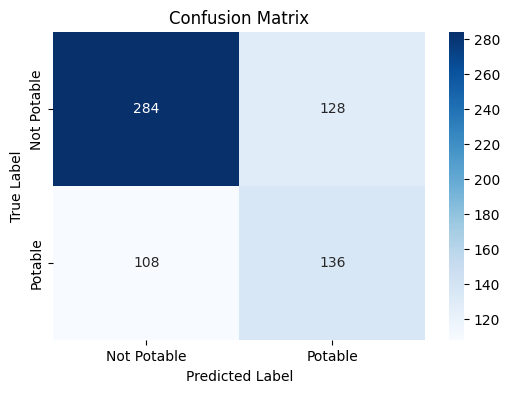

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71       412
           1       0.52      0.56      0.54       244

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.65      0.64      0.64       656

Evaluating Dropout Model:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


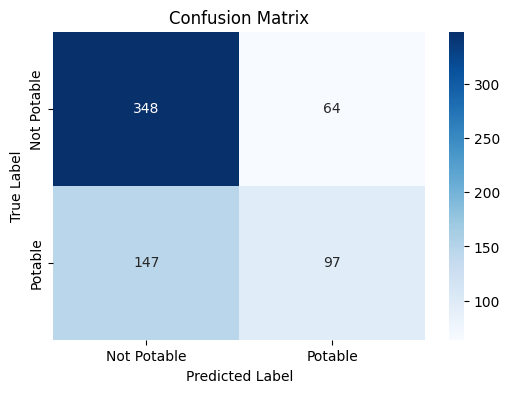

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.77       412
           1       0.60      0.40      0.48       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656

Evaluating RMSProp Model:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


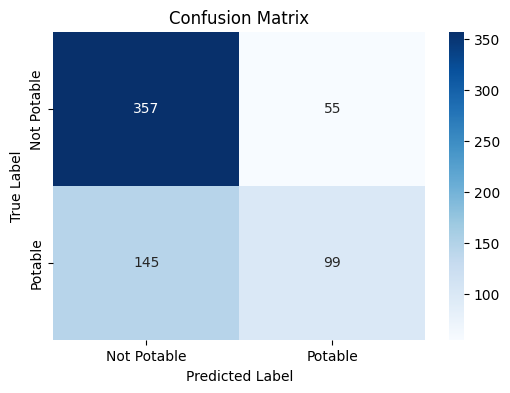

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78       412
           1       0.64      0.41      0.50       244

    accuracy                           0.70       656
   macro avg       0.68      0.64      0.64       656
weighted avg       0.69      0.70      0.68       656

Evaluating l1 Model:
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


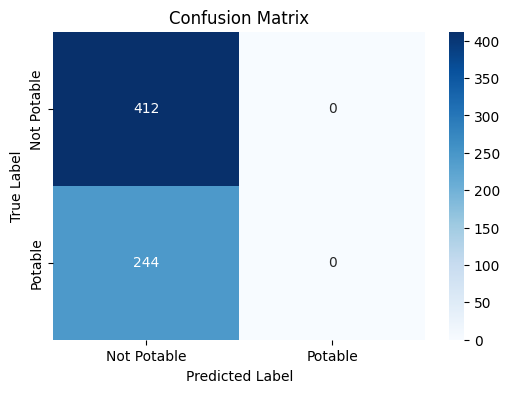

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Evaluating l1 Model with RMSprop:
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


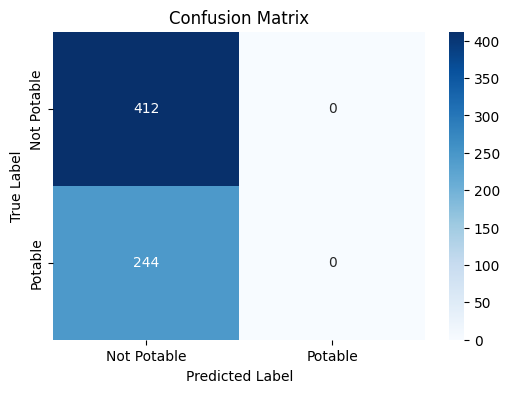

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Evaluating l2 Model With Dropout:
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


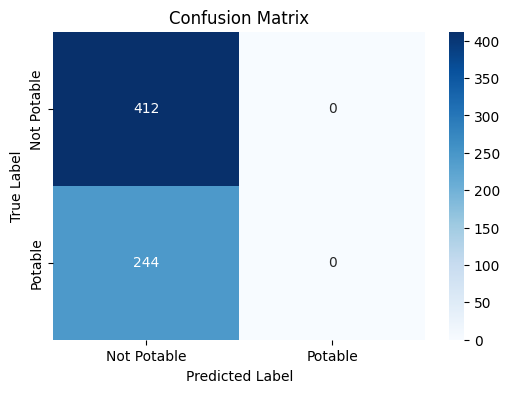

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
# Evaluate of models
print("Evaluating Vanila Model:")
evaluate_model(model, X_test, y_test)


print("Evaluating Dropout Model:")
evaluate_model(model_dropout, X_test, y_test)

print("Evaluating RMSProp Model:")
evaluate_model(model_rmsprop, X_test, y_test)

print("Evaluating l1 Model:")
evaluate_model(model_l1, X_test, y_test)

print("Evaluating l1 Model with RMSprop:")
evaluate_model(model_l1_rmsprop, X_test, y_test)

print("Evaluating l2 Model With Dropout:")
evaluate_model(model_l2_dropout, X_test, y_test)


In [110]:
model.save('water_quality_model.keras')